# India House Rental Exploration

**Report summary**

Our dataset has information on almost 4700+ Houses/Apartments/Flats Available for Rent in India. We have explored how some important features like releasing time, size, location, and number of rooms will influence the rental. The results show that rent price of a property is affected by multiple factors, and some of the relationships are more complex than linear.

**Team member**: Yu Ting Hung, Zheman Zhong, Guang Yang, Mehul Agarwal, Sixuan Wang

**The Rental Market Boosts in India, and it becomes a problem**

*The Economic Times* released an [article](https://economictimes.indiatimes.com/industry/services/property-/-cstruction/its-time-to-be-a-greedy-landlord-amid-indias-rental-housing-demand-boom/articleshow/93687475.cms?from=mdr) at Auguest 2022 titled *`It’s time to be a greedy landlord amid India’s rental housing demand boom`*, indicating that India has seen a major spike in rental demand, resulting in a rise in residential rentals. "**Indian rental housing searches grew 84.4% year-on-year** in the second quarter of this year and 29.4% on sequential basis. Moreover, the cumulative rental housing listings increased 3% quarter-on-quarter and 28.1% on year across 13 Indian cities mapped." The rental market is going crazy in India.

  Therefore, our goal is to **explore potential factors that influence rent price.** We could **help tenants understanding the rental market, and both tenants and landords in reasonable pricing prediction.**


**Dataset Description**

The dataset includes almost 4700+ of the India Listing Houses/Apartments/Flats available for rent. The dataset collects the listing houses from April 2022 to August 2022, with different parameters like when a list is posted, and the descriptive features of the listing houses.

**Data source:** 

Original source: Magicbricks(https://www.magicbricks.com/)

Dataset link: https://www.kaggle.com/datasets/iamsouravbanerjee/house-rent-prediction-dataset



**Attributes Definition**




| Column title       | Description                                                  |
| :----------------- | :----------------------------------------------------------- |
| `Post on`        | Date of the rent price post on. |
| `BHK`         | Number of Bedrooms, Hall, Kitchen.|
| `Rent` | Rent price of the Houses/Apartments/Flats. |
| `Size`       | Size of the Houses/Apartments/Flats in Square Feet.                         |
| `Floor`    | Houses/Apartments/Flats situated in which Floor and Total Number of Floors (Example: Ground out of 2, 3 out of 5, etc.)                    |
| `Area Type`       | Size of the Houses/Apartments/Flats calculated on either Super Area or Carpet Area or Build Area.              |
| `Area Locality`       | Locality of the Houses/Apartments/Flats.             |
| `City`       | City where the Houses/Apartments/Flats are Located.            |
| `Furnishing Status `       | Furnishing Status of the Houses/Apartments/Flats, either it is Furnished or Semi-Furnished or Unfurnished.
              |
| `Tenant Preferred`       | Type of Tenant Preferred by the Owner or Agent.         |
| `Bathroom `       |Number of Bathrooms.             |
| `Point of Contact `       | Whom should you contact for more information regarding the Houses/Apartments/Flats.           |

## 1. Data Overview and Preprocessing

### 1.1 Data Overview

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive
drive.mount('/content/drive')
data_folder = '/content/drive/Shareddrives/BA780-B9/'

Mounted at /content/drive


In [ ]:
df = pd.read_csv(data_folder+'House_Rent_Dataset.csv')
display(df.head(),df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4746 entries, 0 to 4745
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Posted On          4746 non-null   object
 1   BHK                4746 non-null   int64 
 2   Rent               4746 non-null   int64 
 3   Size               4746 non-null   int64 
 4   Floor              4746 non-null   object
 5   Area Type          4746 non-null   object
 6   Area Locality      4746 non-null   object
 7   City               4746 non-null   object
 8   Furnishing Status  4746 non-null   object
 9   Tenant Preferred   4746 non-null   object
 10  Bathroom           4746 non-null   int64 
 11  Point of Contact   4746 non-null   object
dtypes: int64(4), object(8)
memory usage: 445.1+ KB


,Posted On,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
0,2022-05-18,2,10000,1100,Ground out of 2,Super Area,Bandel,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner
1,2022-05-13,2,20000,800,1 out of 3,Super Area,"Phool Bagan, Kankurgachi",Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
2,2022-05-16,2,17000,1000,1 out of 3,Super Area,Salt Lake City Sector 2,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
3,2022-07-04,2,10000,800,1 out of 2,Super Area,Dumdum Park,Kolkata,Unfurnished,Bachelors/Family,1,Contact Owner
4,2022-05-09,2,7500,850,1 out of 2,Carpet Area,South Dum Dum,Kolkata,Unfurnished,Bachelors,1,Contact Owner


None

### 1.2 Missing Values Handling

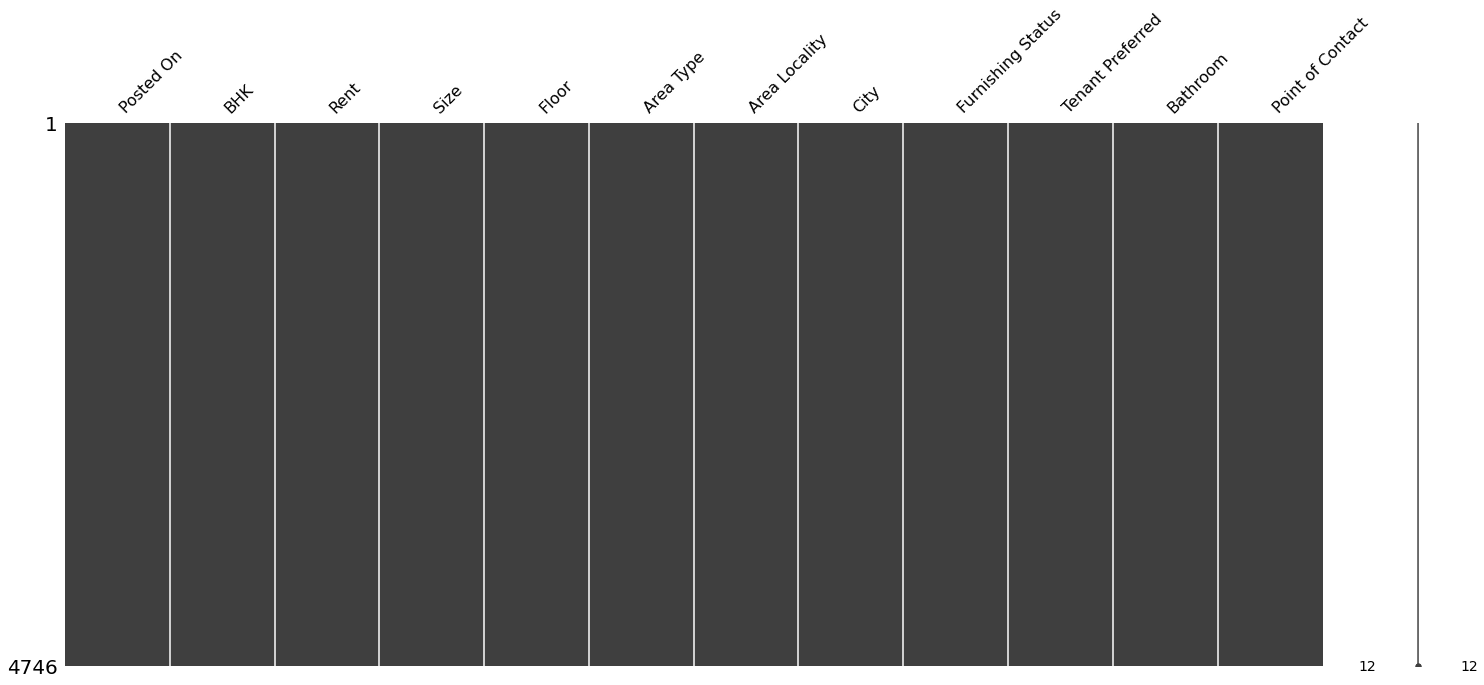

In [ ]:
import missingno as msno
msno.matrix(df)

From the missingno plot, we can conclude that there is no missing values in any column. The dataset is extremely clean.

###1.3 Outliers Handling

In [ ]:
# IQR method outlier detection
def outliers(feature):
  Q1 = df[feature].quantile(0.25)
  Q3 = df[feature].quantile(0.75)
  IQR = Q3 - Q1
  LL = Q1 - 1.5 * IQR
  UL = Q3 + 1.5 * IQR
  if (LL>0):
    print(LL)
  print(UL)

outliers('Rent')
outliers('Size')

67500.0
2175.0


We first tried IQR method to identify outliers. The rules are: set the lower quartile (25%) as Q1 and the upper quartile (75%) as Q3 , then set the interquartile range `IQR = Q3 - Q1` (the range for the middle 50% of the samples). Any values lower than `Q1−1.5×IQR` or greater than `Q3+1.5×IQR` will be viewed as outliers. Using this method, the outliers will be those rent above 67500 or size above 2175. We will drop more than 500 samples for that criteria, which is not reasonable. We also draw the box plot to visualize the outliers.

In [ ]:
import plotly.express as px
fig=px.box(df,x='Rent',color='City',height=300,width=800)
fig2=px.box(df,x='Size',color='City',height=300,width=800)
fig.show()
fig2.show()

From the box plot, we can see except for an extreme value in the rent plot (the green dot with rent 3.5M), all other data are distributed uniformly.

Consider the real-world case, the rent price should have a large variation due to different location and size, especially for those luxury houses. For the size, the largest one is 8000 sq ft, which is also reasonable for a big house. We finally decide to **drop only one sample with the highest rent value (3500000)**. The rent of it is more than twice larger than the second highest rent value. Plus, the size of it is not that large (compare to other luxury apartment), and the location is in Bangalore, not Mumbai. **We view it as the outlier and may negatively influence the subsequent mapping and analysis.**

In [ ]:
df.drop(df[(df['Rent'] == df['Rent'].max())].index, inplace=True)

###1.4 Feature Engineering

In [ ]:
for index, row in df.iterrows():
    if (df.loc[index,'Floor']=='Ground'):
      df.loc[index,'building_height']=0
    else:
      df.loc[index,'building_height']=int(df.loc[index,'Floor'][-2:])
      
for index, row in df.iterrows():
    if(df.loc[index,'Floor'][0:6]=='Ground'):
      df.loc[index,'floor_located']=0
    elif(df.loc[index,'Floor'][6:14]=='Basement'):
      df.loc[index,'floor_located']=1 
    else:
      df.loc[index,'floor_located']=int(df.loc[index,'Floor'][:2])

df.drop(['Floor'],axis=1,inplace=True)

For the feature **Floor**, it is hard for us to get the information from the raw string data. However, we can split it into two numerical features **floor_located** and **building_height**. For instance, if the value of **Floor** is **"2 out of 4"**, it will be split to two features, with **floor_located=2** and **building_height=4**.

In [ ]:
df3 = df.copy()
df3['Posted On'] = pd.to_datetime(df3['Posted On'])
df3['Posted On'] = df3['Posted On'].dt.month

We also extract month information from feature **Posted On** for the convenience of building correlation matrix (see 1.5) and feature importance plot (see 1.7).

###1.5 Correlation Matrix


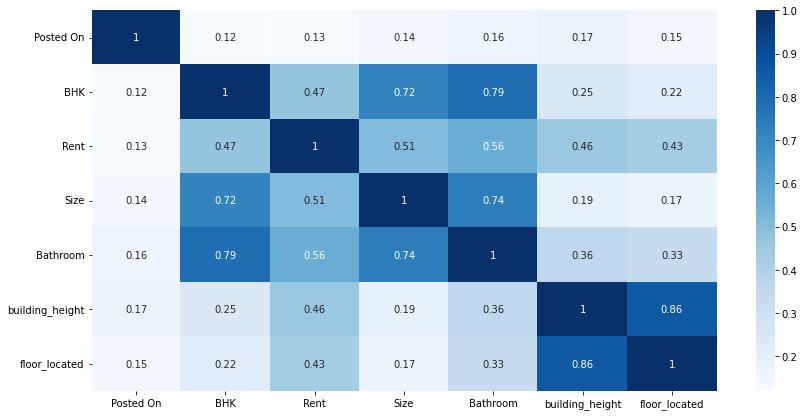

In [ ]:
# find out the correlation of diffent variables 
correlation = df3.corr().round(2)
plt.figure(figsize = (14,7))
sns.heatmap(correlation, annot = True, cmap = 'Blues');

From the correlation plot, we found that the features **"BHK", "Size"** and **"Bathroom"** are highly correlated with each other. This quite make sense because the larger the size is, the more rooms (BHK) there will be, as well as the more bathrooms it need to be equipped with. **"floor_located"** and **"building_height"** are also highly correlated, because they are extracted from the same feature **"Floor"**.

Another interesting finding is the correlation between **"Rent"** and **"Size"** is not that significant. One potential reason might be we can't guarantee that the houses are in the same city and the same neighborhood class. If two houses are located in different city (Like Mumbai and Kolkata) and different neighborhood class, even though their size are similar, the rent price may vary a lot. In Question 2 we will explore the relationship between "Rent" and "Size" given the same city.

###1.6 Target Variable

Our target variable is **Rent**. The following code will show some basic statistical information of our target variable. The distribution of the target variable will be displayed together with feature **Size** in Part 2.1.

In [ ]:
print('The median of the India House price is {}'.format(int(df.Rent.median())))
print('The mean of the India House  price is {}'.format(int(df.Rent.mean())))
print('The mode of the India House price is {}'.format(int(df.Rent.mode())))
print('The most expensive house was rent for {}'.format(int(df.Rent.max())))

The median of the India House price is 16000
The mean of the India House  price is 34263
The mode of the India House price is 15000
The most expensive house was rent for 1200000


###1.7 Feature Importance

In [ ]:
from sklearn.ensemble import RandomForestClassifier
df2 = df3.drop(['Area Locality'],axis=1)
df2= pd.get_dummies(df2,drop_first = True)

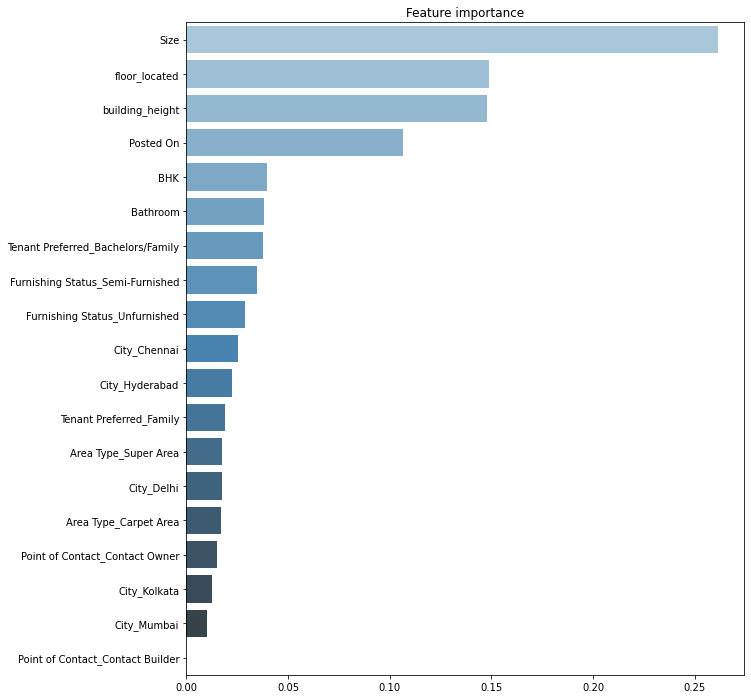

In [ ]:
x,y=df2.drop(['Rent'],axis=1), df2['Rent']
clf = RandomForestClassifier(random_state=45)
clf = clf.fit(x, y)
# Plot features importances
imp = pd.Series(data=clf.feature_importances_, index=x.columns).sort_values(ascending=False)
plt.figure(figsize=(10,12))
plt.title("Feature importance")
ax = sns.barplot(y=imp.index, x=imp.values, palette="Blues_d", orient='h')

We have built a random forest model and get the top 6 most important features, which are **Size**, **floor_located**, **building_height**, **Posted On**(time), **BHK** and **Bathroom**. We will follow this sequence to discover the relationship between the top 6 most important features and our target variable **Rent**. Then we will try to explore other features that may also influence the rent price.

## 2. Data Exploration

### 2.1 Question 1: What is the relationship between house size and house rent?


In the beginning, we wanted to know what is the relationship between the size of the room in the data set and the rent. By analyzing their distribution graphs, we found that the distribution graphs of room size and rent are right-skewed. It means that the average value of room size and rent is greater than the mode, indicating that they are directly proportional to each other but have a maximum value that affects their distribution. So we make a log rent and log size distribution graph, and we find out the distribution of rent is right skewed, the distribution of size is a normal distribution.


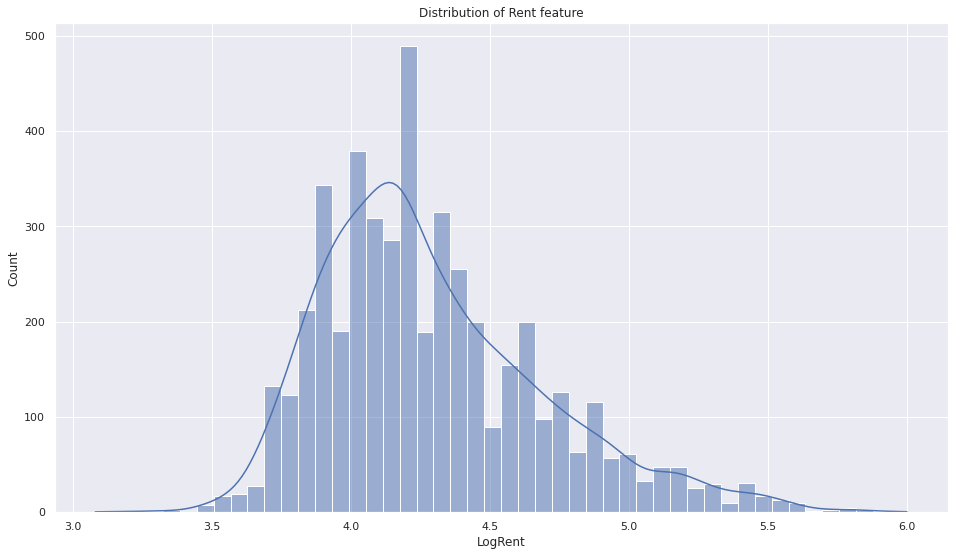

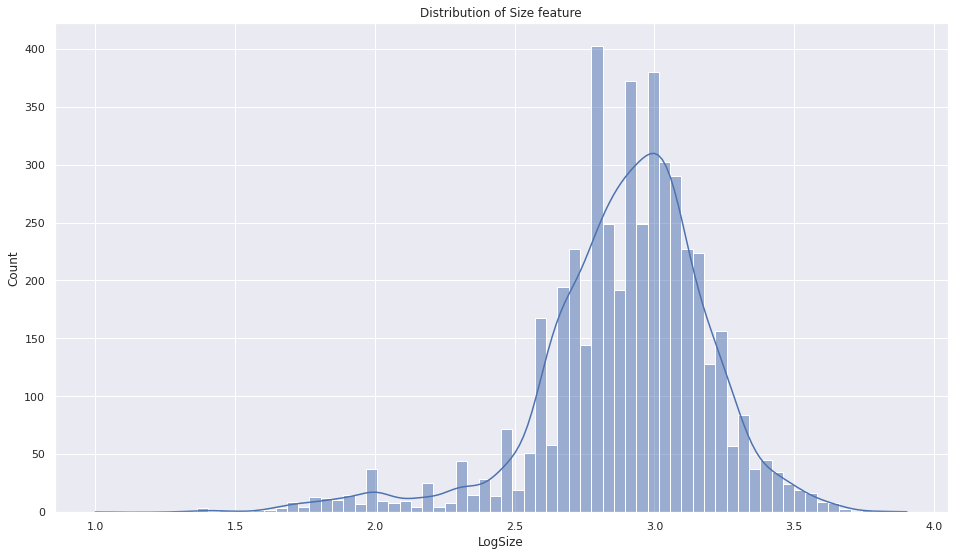

In [ ]:
# set two distribution graph of rent and size  
df.drop(df[(df['Rent'] == df['Rent'].max())].index, inplace=True)
df['LogRent'] = np.log10(df['Rent'])
df['LogSize'] = np.log10(df['Size'])
sns.set(rc={'figure.figsize': (16, 9)})
plt.title('Distribution of Rent feature')
sns.histplot(df, x='LogRent', kde=True)
plt.show()

sns.set(rc={'figure.figsize': (16, 9)})
plt.title('Distribution of Size feature')
sns.histplot(df, x='LogSize', kde=True);
plt.show()


After analyzing the relationship between house size and house rent, we want to continue to analyze the relationship between different cities. Generally speaking, the development of a city must be accompanied by high housing prices. In addition to the well-known Mumbai, which other cities have housing prices in the stage of the rapid rise and which cities have housing prices in the stage of slow rise, we are very curious about how different the relationship between the size and rent is in different cities.

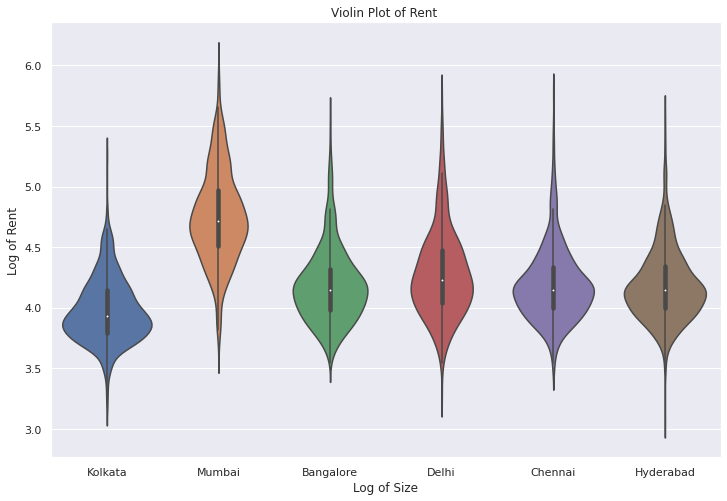

In [ ]:
plt.figure(figsize = (12,8))
sns.violinplot(data = df,x='City',y='LogRent')
plt.xlabel("Log of Size")
plt.ylabel("Log of Rent")
plt.title('Violin Plot of Rent ')
plt.show()

From the violin plot, we can see how each city has a unique distribution. For example, we can see that the rental market in Bangalore is comprised mostly of lower-rent homes, but has some properties going for vastly higher rents. In general, the cheapest city to live in is Kolkata and the most expensive city is Mumbai which is more or less in line with what we would expect.

<Figure size 864x576 with 0 Axes>

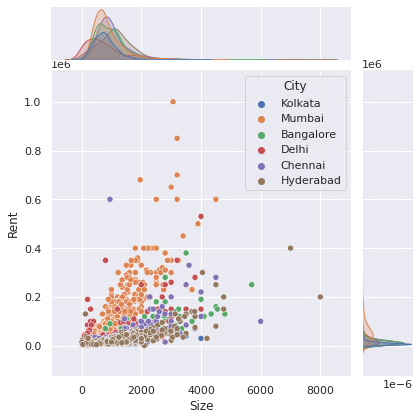

In [ ]:
#how floor space relates to rent prices
plt.figure(figsize = (12,8))
sns.jointplot(data=df,x='Size',y='Rent',hue='City')
plt.show()


We used a jointplot to find the relationship between rent and room size in different cities, in which we found many interesting points. 

1. We can find that the rents in Mumbai and Delhi are much higher than in other cities under the same room size, especially in the room size range of 1000 to 2000. Because Mumbai in India is like new york city in the US, the size of Mumbai is concentrated in the range of 1500 to 2000. In addition, because Mumbai is the richest city in India, there are many large and expensive houses in Mumbai in our dataset.
2. However, in Delhi, the rental price in this city is generally lower than that in Mumbai, but most of the rented houses are small apartments, and the rental records are not as many as in Mumbai, so although its rent price is not as high as in Mumbai. But when it comes to renting a house of the same size, prices in Delhi are also higher than in other cities, some even approaching prices in Mumbai.

3.  In cities with relatively low room prices, the number of rentable rooms in Hyderabad is far greater than that in Kolkata. Therefore, we guess that Hyderabad should be a major city for industrial development and a city where a large number of low-income people gather. But Kolkata should be a city where a small number of residents rent houses. Although they are all cities with relatively low housing price growth, the reasons for the low housing price growth are quite different.

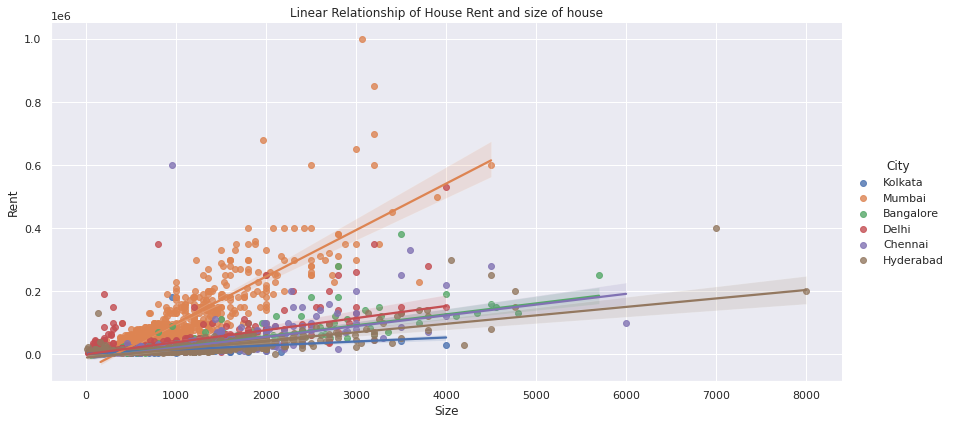

In [ ]:
# Linear Relationship of House Rent and size of house

sns.lmplot(x="Size", y="Rent", data=df,hue='City', height=6, aspect=2)
plt.xlabel("Size")
plt.ylabel("Rent")
plt.title("Linear Relationship of House Rent and size of house")
plt.show()


Because the slope of Mumbai and Delhi is higher than other cities, we believe that Mumbai, as India's most promising international city, has a great influence on the housing price prediction of the data set, and Delhi is a city that is likely to increase housing prices in the future.

###2.2 Question 2: How will the floor location and building height influence the house rent?


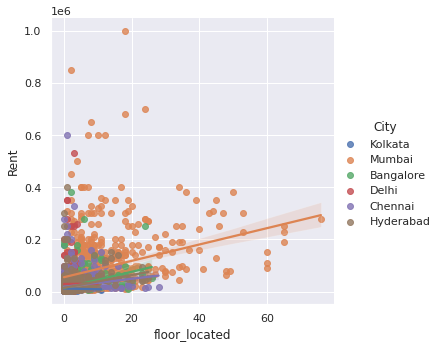

In [ ]:
sns.lmplot(x='floor_located',y='Rent',hue='City',data=df)

From the plot, we can conclude that for most of the cities, there is a positive relationship between variable floor_located and rent price. Another finding is that most of the high-rise apartments are all in Mumbai (in orange color).

In [ ]:
for index, row in df.iterrows():
    if (df.loc[index,'building_height']<=4):
      df.loc[index,'floor_type']='low_rise'
    else:
      df.loc[index,'floor_type']='high_rise'
df.groupby('floor_type')['Rent'].mean()

floor_type
high_rise    60498.611967
low_rise     19390.465641
Name: Rent, dtype: float64

Low-rise buildings are defined as buildings with 4 floors or under (referenced by https://www.rentcafe.com/blog/apartmentliving/high-mid-rise-residential-buildings-overshadowing-low-rise/). The average rent price for low-rise buildings in India is 19390, while the average rent price for high-rise buildings is 61173. This difference is mainly because high-rise buildings are generally located in better geographic areas. As shown in the previous plot, most of the high-rise buildings are located in Mumbai, which has a relatively higher rent price.

###2.3.1 Question 3-1: How many houses are posted each city through out time?

In [ ]:
from datetime import datetime as dt
import calendar
# copy df to df_in_month to modify the posted on column
df_in_month = df.copy()

# keep the month only
df_in_month['Posted On'] = pd.to_datetime(df_in_month['Posted On'])
df_in_month['Posted On'] = df_in_month['Posted On'].dt.month

In [ ]:
print(df["Posted On"].min(),df["Posted On"].max())

2022-04-13 2022-07-11


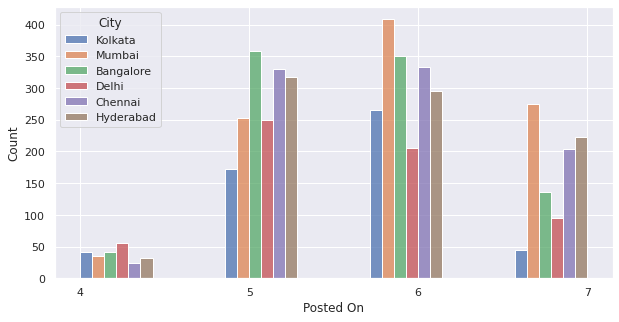

In [ ]:
plt.figure(figsize=(10,5))

pic = sns.histplot(data = df_in_month, x = 'Posted On', hue = 'City', multiple="dodge", bins=7)
pic.set(xticks=[4, 5, 6, 7]);

The plot shows the counts of houses from April to July(2022-04-13 to 2022-07-11) all change in each city from our dataset. Despite that the dataset collected from mid-April to mid-July, we can still see that not many houses are listed in April and the renting market supply raised after May.

### 2.3.2 Question 3-2: Do average rent of each city change through out time?

In [ ]:
# calculate monthly average rent in each city
monthly_avg_rent = df_in_month.groupby(['Posted On','City'])['Rent'].mean()

# change monthly_avg_rent into dataframe
monthly_avg_rent = monthly_avg_rent.to_frame()
monthly_avg_rent.sort_values(by=['Posted On', 'City'])[0:]

Rent
Posted On City                   
4         Bangalore  15157.317073
          Chennai    10591.666667
          Delhi      20009.090909
          Hyderabad  16406.250000
          Kolkata    12766.463415
          Mumbai     37814.285714
5         Bangalore  18530.114525
          Chennai    18941.060606
          Delhi      25914.859438
          Hyderabad  15059.330189
          Kolkata    10451.132948
          Mumbai     80584.588933
6         Bangalore  20466.197143
          Chennai    20631.570571
          Delhi      36055.339806
          Hyderabad  20179.322034
          Kolkata    11769.811321
          Mumbai     83996.343137
7         Bangalore  30895.588235
          Chennai    28838.691176
          Delhi      29934.736842
          Hyderabad  29484.372197
          Kolkata    14480.000000
          Mumbai     93637.461818

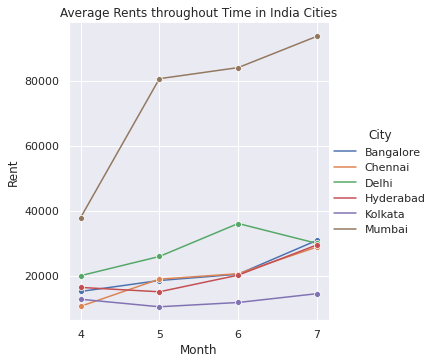

In [ ]:
# Show plt
pic = sns.relplot(x="Posted On", y='Rent', hue="City", data=monthly_avg_rent, kind='line', marker='o');
pic.set(xticks=[4, 5, 6, 7]);
pic.set_xlabels("Month");
plt.title("Average Rents throughout Time in India Cities");

Yes, we can see that the average rents from April to July all change in each city from our dataset. Mumbai has the highest average rent over other cities. In April, Mumbai had almost **"double"** average rent than other ones. It reached over 80,000 Rupees in May, which was **four times higher** than the rest, and the figure still increased in June and July. Bangalore, Chennai, Delhi, and Hyderabad had diverse average rents in April, and we notice the convergence of their average rents(close to 30,000 Rupees) in July. Kolkata had a slight drop in average rent from April to May, it bounced back in May and surpassed the initial average rent in July. To sum up, **Mumbai**, the finacial center and the largest city of India (by population), **has several times of average rent over other cities. Bangalore, Chennai, Delhi, and Hyderabad show the convergence of their average rents from April to July.** We can see that the month of listing of property affect the rent of the house in all cities. That leads to our next question- Does house size affect the rent?

### 2.4 Question 4: Does the number of rooms and room combination affect the rent price? Would the situation in different cities will be various?

####2.4.1 **number of rooms & room combination & rent price**
How does the number of rooms affect the rent price? If we set the size of the house aside, are there some specific combination of BHK and Bathroom that enjoy higher price or not? What could be the possible reasons for the observations?

In [ ]:
df1=df.copy()
df['total_rooms'] = df['BHK'] + df['Bathroom']
df['price_per_SQfoot'] = df['Rent'] / df['Size']

In [ ]:
df1["BHK"]=df1["BHK"].astype("str")
df1["Bathroom"]=df1["Bathroom"].astype("str")
df1['room_comb'] = df1['BHK'] + 'bhk'+df1['Bathroom']+'b'
df1['price_per_SQfoot'] = df1['Rent'] / df1['Size']

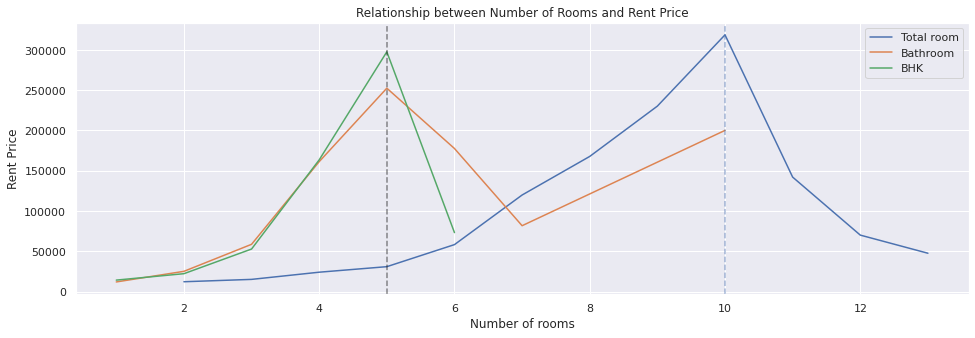

<Figure size 1152x648 with 0 Axes>

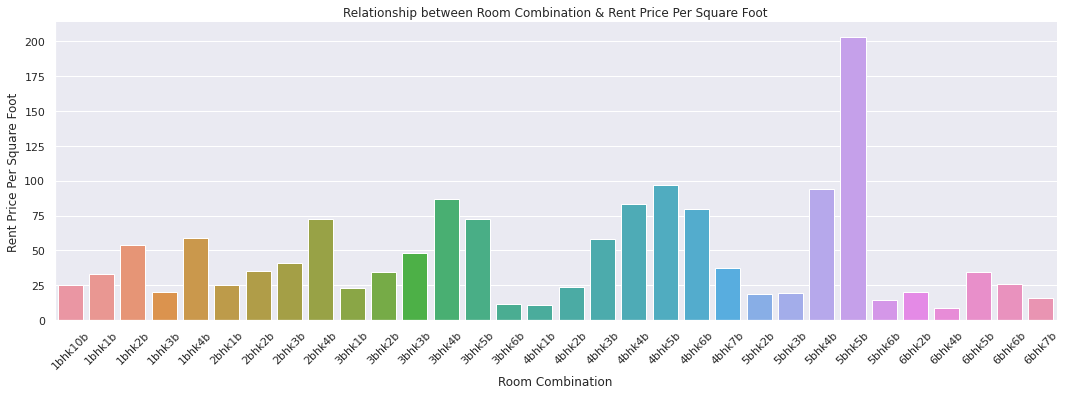

In [ ]:
#Relationship between Number of Rooms and Rent Price
fig1 = plt.figure(figsize=(16,5))
ax1= sns.lineplot(x='total_rooms', y='Rent', data=df.sort_values('total_rooms'),label='Total room', ci=None)
ax2 = sns.lineplot(x='Bathroom', y='Rent', data=df.sort_values('Bathroom'), label='Bathroom',ci=None)
ax3 = sns.lineplot(x='BHK', y='Rent', data=df.sort_values('BHK'), label='BHK',ci=None)

ax1.set(xlabel ='Number of rooms', ylabel ='Rent Price')
plt.axvline(5, color="k", linestyle="--",alpha=0.5)
plt.axvline(10, color="b", linestyle="--",alpha=0.5)
plt.title('Relationship between Number of Rooms and Rent Price')
plt.show();

#Relationship between Room Combination & Rent Price Per Square Foot
fig2 = plt.figure()
ax4= sns.catplot(x='room_comb', y='price_per_SQfoot', data=df1.sort_values('room_comb'),kind='bar',aspect=3, ci=None)
plt.xticks(rotation=45)
plt.title('Relationship between Room Combination & Rent Price Per Square Foot' )
ax4.set(xlabel ='Room Combination', ylabel ='Rent Price Per Square Foot')
plt.show();

**Chart interpretation:**
 
1. From the first line chart, it is clear the peaks of the rent price lines are shown when having 5 bathrooms, 5 BHK, and 10 total rooms respectively. And when the room number is between 1 to 5, the line of Bathroom and BHK are highly coincident, both of which increase dramatically when the room number improves from 3 to 5. From the line of the number of total rooms, it can be concluded that the house with more than 8 rooms and less than 11 rooms in total enjoys a high-level rent price.
2. From the second bar figure, we can find that when keeping the BHK the same, more bathroom houses will have higher rent prices per square foot. Generally, a one-to-one ratio combination of the bathroom and BHK enjoys a higher rent price.

**Possible reasons:**
1. Family size in India is large. so the house with more rooms will be more popular and the rent price could be higher.  
2. Again because of the general family size in India, 3 to 5 BHK(Bedroom) and 3 to 5 Bathroom could be necessary, but the more rooms than that may not be, so the price goes down.
3. The location of the house is another important reason. Combining what we have found previously, the rent price in 'Mumbai' is much higher than other cities, and most of the houses in Mumbai do not have big size and many rooms. Therefore, the average price of houses are highly influenced.
 



**However, why the Rent Price Per Square Foot of 5bhk5b is much higher than other room types?**

In [ ]:
df1[df1.room_comb =='5bhk5b'][['Rent','Size','City','room_comb','price_per_SQfoot']].sort_values('price_per_SQfoot', ascending=False)

,Rent,Size,City,room_comb,price_per_SQfoot
2656,190000,200,Delhi,5bhk5b,950.000000
1319,650000,3000,Mumbai,5bhk5b,216.666667
792,600000,3200,Mumbai,5bhk5b,187.500000
666,350000,1880,Mumbai,5bhk5b,186.170213
543,400000,2308,Mumbai,5bhk5b,173.310225
1384,600000,4500,Mumbai,5bhk5b,133.333333
839,450000,3400,Mumbai,5bhk5b,132.352941
1023,500000,3900,Mumbai,5bhk5b,128.205128
1393,310000,2800,Mumbai,5bhk5b,110.714286
1037,350000,3250,Mumbai,5bhk5b,107.692308


From the chart, it can be noticed that the house in Delhi with 5bhk5b enjoys the highest rent price per square foot(950), which could make the average price per square foot dramatically different, since there are only 12 records.

In [ ]:
# checking the record in Delhi with 5bhk5b
df1[(df1.City == 'Delhi') & (df1.room_comb =='5bhk5b')]

,Posted On,BHK,Rent,Size,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact,building_height,floor_located,LogRent,LogSize,floor_type,room_comb,price_per_SQfoot
2656,2022-05-22,5,190000,200,Carpet Area,"Safdarjung Development Area, Hauz Khas",Delhi,Unfurnished,Bachelors,5,Contact Agent,2.0,2.0,5.278754,2.30103,low_rise,5bhk5b,950.0


For the record in Delhi, we notice that it would be impossible for a house which is only 200 square feet but has 5 bhk and 5 bathrooms, 10 rooms in total. Therefore, this record could be an outlier that should be dropped for further analysis.

In [ ]:
# drop the row with outlier 
df1 = df1.drop(2656)

In [ ]:
#checking records with 5bhk5b
print("There are" , len(df1[df1.room_comb =='5bhk5b']),"records with 5bhk5b in the dataset")

There are 11 records with 5bhk5b in the dataset


Apart from the unreasonable record in Delhi, again, in previous chart, it can be found that this dataset only containing **11** records with 5bhk5b, and **10** of them are located in **Mumbai**, which is one of the biggest cities in India and has much higher rent prices than other cities. So, the price per foot of 5bhk5b could be higher than other houses which include more houses located in various cities.

####2.4.2 **Rent Price & Room Combination based on different Cities**

From previous analysis, it is obvious that discussing the rent price and rent price per foot based on different cities could be helpful for having a deeper understanding of the situation.

In [ ]:
#finding the average size, rent, price_per_SQfoot in different cities
df1[['Size','Rent','price_per_SQfoot','City']].groupby('City').mean().sort_values('Rent', ascending= False).reset_index()

,City,Size,Rent,price_per_SQfoot
0,Mumbai,901.687951,84173.234809,81.505835
1,Delhi,787.377483,29196.192053,66.170620
2,Chennai,1031.713805,21614.092031,19.785751
3,Bangalore,984.214689,21039.774011,20.194397
4,Hyderabad,1186.669355,20555.048387,23.585529
5,Kolkata,787.366412,11645.173664,16.491473


From the chart, we can find that Mumbai has the highest price of house renting(average renting price is 84173.23), in addition even though the houses in Delhi are not as expensive as those in Mumbai, their average rent price per square feet is much higher than other cities, since the average size of houses in Delhi are lower than other cities. Therefore, it is reasonable for us to do further analysis based on different cities the houses are located in, because apparently, the rent price varies widely in different cities.


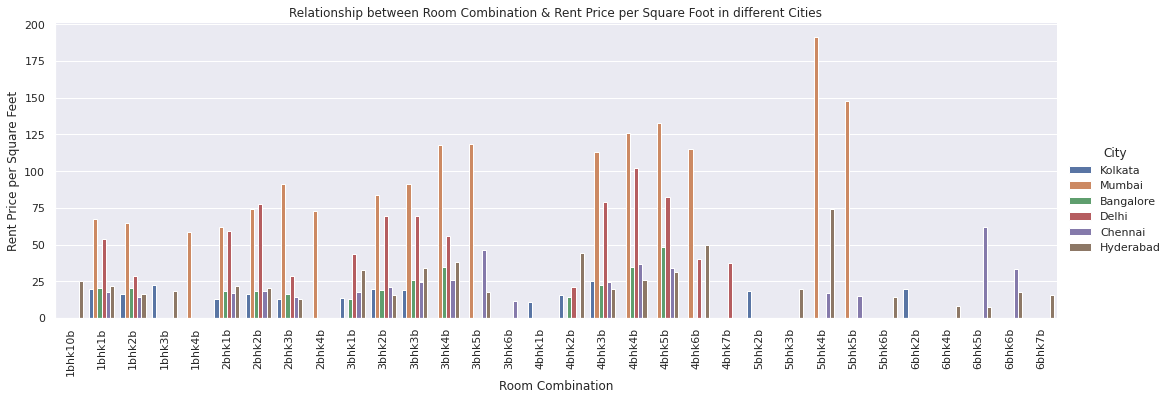

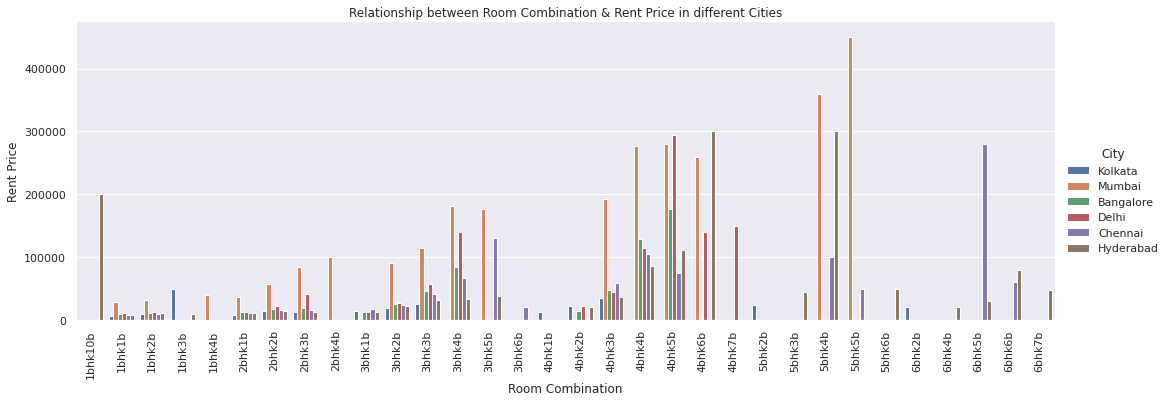

In [ ]:
#plot the Rent price per square foot based on Room Combination and City
sns.catplot(x='room_comb', y='price_per_SQfoot', data=df1,hue='City',kind='bar',aspect=3, ci=None,order = sorted(df1.room_comb.unique()))
plt.xticks(rotation=90)
plt.title('Relationship between Room Combination & Rent Price per Square Foot in different Cities' )
plt.xlabel("Room Combination")
plt.ylabel("Rent Price per Square Feet")
plt.show()

#plot the Rent price based on Room Combination and City
sns.catplot(x='room_comb', y='Rent', data=df1,hue='City',kind='bar',aspect=3, ci=None,order = sorted(df1.room_comb.unique()))
plt.xticks(rotation=90)
plt.title('Relationship between Room Combination & Rent Price in different Cities' )
plt.xlabel("Room Combination")
plt.ylabel("Rent Price")
plt.show()

Interesting findings from the plots:

In the second plot, 1bhk10b in Hyderabad enjoys a much higher rent price than other houses with 1bhk, even higher than some houses with more BHK or rooms. While, in the first plot, its rent price per feet is not showing an obviously different pattern.


In [ ]:
# checking the record in Hyderabad with 1bhk10b
df1[(df1.City == 'Hyderabad') & (df1.room_comb =='1bhk10b')]

,Posted On,BHK,Rent,Size,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact,building_height,floor_located,LogRent,LogSize,floor_type,room_comb,price_per_SQfoot
4185,2022-06-06,1,200000,8000,Super Area,"Beeramguda, Ramachandra Puram, NH 9",Hyderabad,Unfurnished,Bachelors/Family,10,Contact Owner,4.0,0.0,5.30103,3.90309,low_rise,1bhk10b,25.0


The record shows that this house(1bhk10b) has a really big size, 8000 square feet in total, containing 10 bathrooms but only one BHK. The house is located on the ground floor without furnishing. So it seems to be a **roughcast** house without separate rooms.

**In summary**, when taking the all cities together into consideration, rent price goes up with the number of rooms increasing before reaching a peak at 5 bhk and 5 bathrooms, after which the rent price goes down. When considering cities separately, rent price basically has positive relationship with the room number, not exactly same as the situation when considering all cities together,which can be explained by that Mumbai, which is the biggest city in India and has much higher rent price than other cities, does not have house with more than 5bhk and 5 bathrooms on renting.
 
From the plots we got, it can be concluded that there are some specific house types(room combinations) that enjoy higher rent prices per square feet. Generally speaking, houses have one-to-one ratio of bhk-to-bathroom and houses have one to two more bathroom than bhk always have higher rent price per square feet ( we want to show the room combination's effect here without the influence of room size, so we choice rent price per square feet to analysis instead of rent price.). In addition, houses with 3 to 5 BHK have higher rent prices per square feet. Relating to India's national conditions, houses with less than 3 bedrooms could be less popular because most families in India are in large size, with more than 4 people living in a house. If we looking deeper to different cities' results, we can find that Mumbai, which has highest rent price, does not have house with more than 5 BHK and 5 bathrooms, so the average rent price of house with more than 5 bedroom, which are basically located in cities with cheaper price, would be lower.

**Some Suggestions:** 

For people who are bachelor, only need one or two BHK, it will be better for them to rent an apartment with the bedrooms they need(renting houses with 1bhk themselves or sharing a 2bhk apartment with another friend would be better choice), instead of sharing a big apartment with many bhks and bathrooms with other ternants, because it is not more expensive in rent price per foot for houses with less BHK campared to houses with more than 4 BHK. (Actually, in some cases, even cheaper, if they do not mind houses with less bathroom than BHK) 

For a big family that want families live all together, houses with more BHK would be only better choice. However, for saving money, taking houses with less bathrooms could be reasonable. After all, for most of the families, sharing bathroom may be not a big deal. 

### 2.5 Question 5: What's the coorelation between furnished status and rent?

<Figure size 1152x648 with 0 Axes>

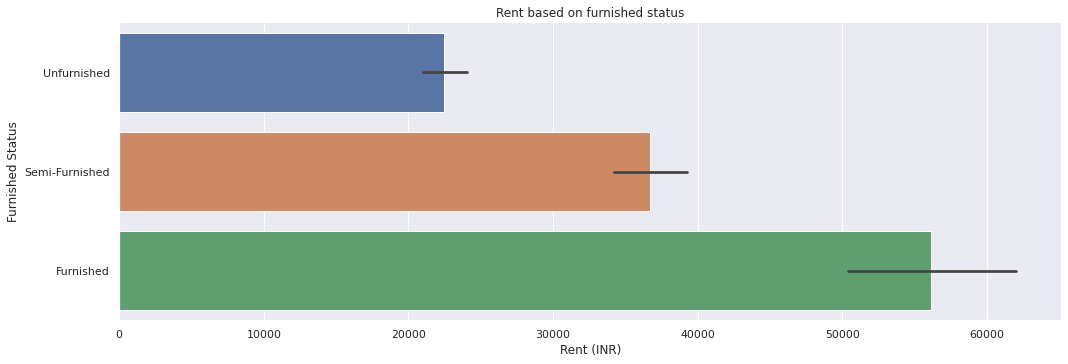

In [ ]:
#Relationship between Furnished status & Rent Price
fig2 = plt.figure()
ax4= sns.catplot(x='Rent', y='Furnishing Status', data=df, kind='bar',aspect=3)
# plt.xticks(rotation=45)
plt.title('Rent based on furnished status' )
ax4.set(xlabel ='Rent (INR)', ylabel ='Furnished Status')
plt.show();

**Chart Interpretation :** 

Rent prices are highly dependent on the furnished status of the property. As expected rent is lowest for unfinished and maximum for furnished (fully-furnished) with semi-furnished in between the two.

### 2.6 Question 6: Can we predict rent based on point of contact?

<Figure size 1152x648 with 0 Axes>

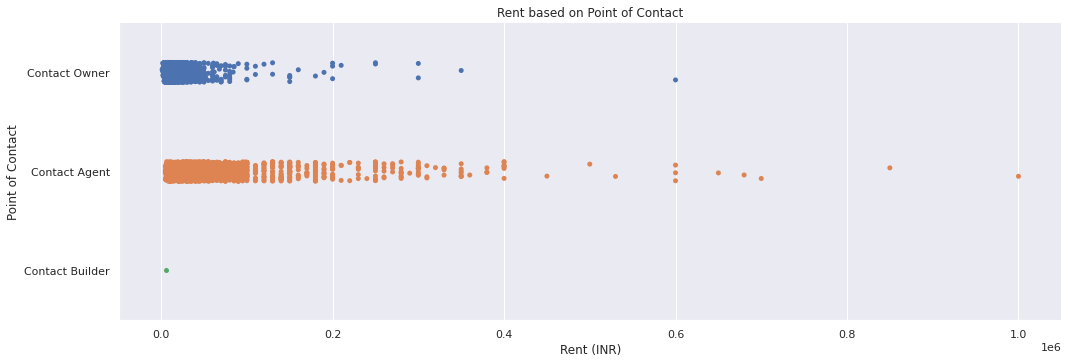

In [ ]:
#Relationship between Point of Contact & Rent Price
fig2 = plt.figure()
ax4= sns.catplot(x='Rent', y='Point of Contact', data=df,aspect=3)
# plt.xticks(rotation=45)
plt.title('Rent based on Point of Contact' )
ax4.set(xlabel ='Rent (INR)', ylabel ='Point of Contact')
plt.show();

**Chart Interpretation :** 

The above shows the relation between rental prices and point of contanct. Cleapest houses are those in which owners directly list their properties for rent, while the once done through agent are on average more expensive. This can be explained by following points:

1. Most people who can afford a realter are people with comparatively higher property value and thus higher rent.
2. The higher the value of the property the harder it would be to find a willing tenant and thus require the need for an agent.

## 3. Conclusion


In this project, we have mainly explored **how some important features like time, size, floor location, building height and number of rooms will influence the rent price.**

From the time dimension, the average rents of the cities all increase from April to July, especially in Mumbai, the average rent doubles within three months, which is 4-time-higher than other cities. For the size, there is a proportional relationship between rent and size given the same city. For the number of rooms, it do affect the rent price but it's not a simple linear relationship. When the house size is fixed, usually the rent price grow up with more rooms in the house, but when the total room exceed 10, rent price goes down. This may caused by some reasons, including the necessity of the extra rooms, effect of the location, and so on. The house types that have one-to-one ratio of BHK to Bathroom, or houses with one or two more bathrooms compaired to bhk, usually enjoy higher rent price. Besides, the house rent price in Mumbai is much higher than that in other cities no matter how the rooms( BHK and Bathrooms) are combined. Last but not least, features like building height, furnishing status and point of contact will also influence the rental.


## Reference
https://www.magicbricks.com/

https://www.kaggle.com/datasets/iamsouravbanerjee/house-rent-prediction-dataset

https://economictimes.indiatimes.com/industry/services/property-/-cstruction/its-time-to-be-a-greedy-landlord-amid-indias-rental-housing-demand-boom/articleshow/93687475.cms?from=mdr

https://seaborn.pydata.org/generated/seaborn.histplot.html

https://www.rentcafe.com/blog/apartmentliving/high-mid-rise-residential-buildings-overshadowing-low-rise/
